##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [8]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import cv2

In [2]:
!apt-get install -y unrar
!unrar x gesture_images.rar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from gesture_images.rar

Creating    gesture_images                                            OK
Creating    gesture_images/open_palm                                  OK
Extracting  gesture_images/open_palm/0.jpg                                 0%  OK 
Extracting  gesture_images/open_palm/1.jpg                                 0%  OK 
Extracting  gesture_images/open_palm/10.jpg                                0%  OK 
Extracting  gesture_images/open_palm/100.jpg                               0%  OK 
Extracting  gesture_images/open_palm/101.jpg                               0%  OK 
Extracting  gesture_images/open_palm/102.jpg                            

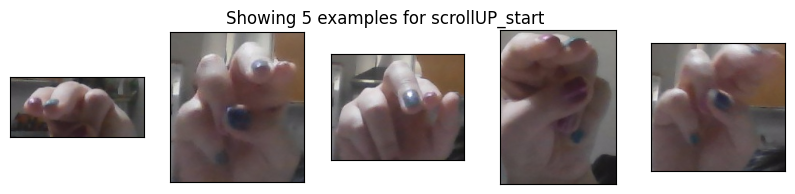

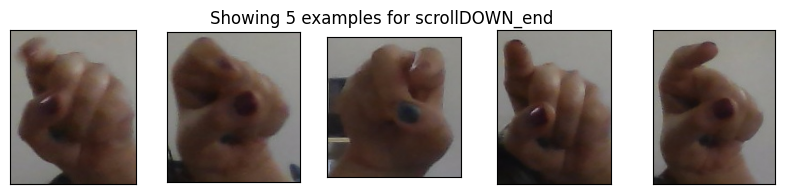

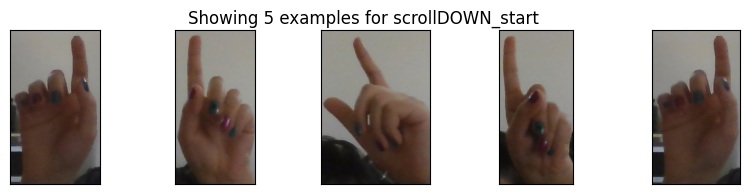

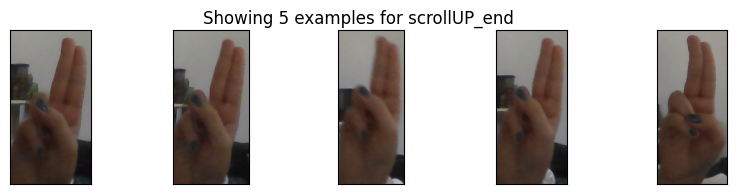

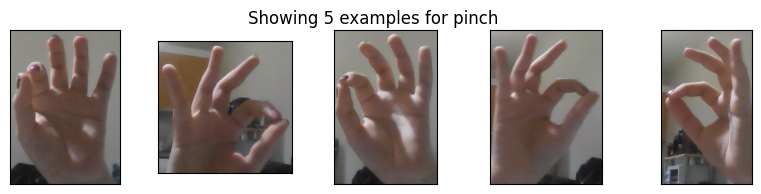

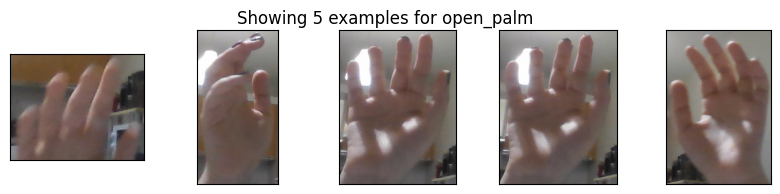

In [4]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "gesture_images"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [5]:
!pip install -q mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━

In [6]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [9]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

# Train the model
hparams = gesture_recognizer.HParams(export_dir="custom_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

In [11]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

73/73 [==============================] - 1s 3ms/step - loss: 0.3336 - categorical_accuracy: 0.8904
Test loss:0.3335888087749481, Test accuracy:0.8904109597206116


In [12]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv custom_model/gesture_recognizer.task custom_gestures.task

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [13]:
from google.colab import files
files.download("custom_gestures.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>